In [1]:
import pandas as pd 
import numpy as np
import sys
import os
sys.path.append('../visualization')
from visualize_eda import generate_visualizations

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/raw/filtered.tsv', sep='\t')
df = df.rename(columns={'Unnamed: 0': 'index', 'lenght_diff': 'length_diff'})
df = df.set_index('index')

df.head()

,reference,translation,similarity,length_diff,ref_tox,trn_tox
index,,,,,,
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


# EDA (Exploratory Data Analysis)
## 1. Understanding the Dataset
Our dataset consists of over 600,000 lines of potential non-toxic and toxic pairs. Each line contains IDs for each pair, the full text for each item, cosine similarity, relative length difference, toxicity level for each item

### Data Columns

| Column | Type | Discription | 
| ----- | ------- | ---------- |
| reference | str | First item from the pair | 
| translation | str | Second item from the pair - paraphrazed version of the reference|
| similarity | float | cosine similarity of the texts |
| lenght_diff | float | relative length difference between texts |
| ref_tox | float | toxicity level of reference text | 
| trn_tox | float | toxicity level of translation text |

In [4]:
print('Shape of the dataframe:', df.shape)
print("Column's name:", df.columns)

Shape of the dataframe: (577777, 6)
Column's name: Index(['reference', 'translation', 'similarity', 'length_diff', 'ref_tox',
       'trn_tox'],
      dtype='object')


In [5]:
df.dtypes

reference       object
translation     object
similarity     float64
length_diff    float64
ref_tox        float64
trn_tox        float64
dtype: object

## 2. Data Cleaning
In our dataset, there are no missing values. However, we found that approximately 3% of the rows are duplicates. To ensure the integrity of our data, we will remove these duplicates.

In [6]:
df.isnull().sum()

reference      0
translation    0
similarity     0
length_diff    0
ref_tox        0
trn_tox        0
dtype: int64

In [7]:
df.duplicated().sum()

19562

In [8]:
df = df.drop_duplicates()
df.shape

(558215, 6)

In [9]:
df['reference_length'] = df['reference'].apply(lambda x: len(str(x).split()))
df['translation_length'] = df['translation'].apply(lambda x: len(str(x).split()))

df['text_combined'] = df['reference'] + ' ' + df['translation']
df['common_words'] = df.apply(lambda row: set(row['reference'].lower().split()).intersection(set(row['translation'].lower().split())), axis=1)
df['common_words_count'] = df['common_words'].apply(len)

In [10]:
exploratory_folder = '../reports/figures/exploratory'
generate_visualizations(df)

## 3. Statistical Summary

-  The cosine similarity between the reference and translation texts values range from 0.6000 to 0.9500, with a mean of approximately 0.7575. Most pairs have high cosine similarity, indicating significant similarity between reference and translated texts
-  The length_diff between reference and translation texts values range from 0.0000 to 0.4000, with a mean of approximately 0.1570
-  The ref_tox column values range from 0.0000 to 0.9997, with a mean of approximately 0.5404
-  The trn_tox column values range from 0.0000 to 0.9997, with a mean of approximately 0.4354

In [11]:
df.describe()

,similarity,length_diff,ref_tox,trn_tox,reference_length,translation_length,common_words_count,reference_stopwords,translation_stopwords
count,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000,558215.000000
mean,0.757504,0.156967,0.540383,0.435356,10.428982,9.823013,4.797594,4.704245,4.685089
std,0.092229,0.107717,0.457531,0.458773,7.096470,6.934946,3.427128,3.827287,3.895230
min,0.600001,0.000000,0.000033,0.000033,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.680582,0.066667,0.012184,0.000747,6.000000,5.000000,2.000000,2.000000,2.000000
50%,0.753365,0.140288,0.802939,0.088179,9.000000,8.000000,4.000000,4.000000,4.000000
75%,0.829740,0.236842,0.990246,0.973573,13.000000,12.000000,6.000000,6.000000,6.000000
max,0.950000,0.400000,0.999724,0.999730,253.000000,179.000000,52.000000,108.000000,102.000000


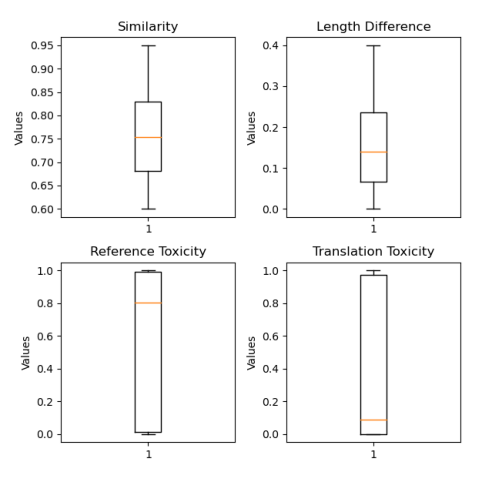

In [12]:
figure_path = os.path.join(exploratory_folder, "box_plots.png")
img = plt.imread(figure_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

## 4. Exploratory Analysis

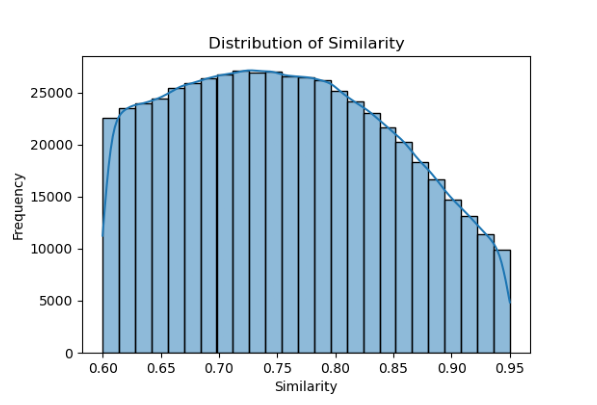

In [13]:
figure_path = os.path.join(exploratory_folder, "similarity_distribution.png")
img = plt.imread(figure_path)
plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

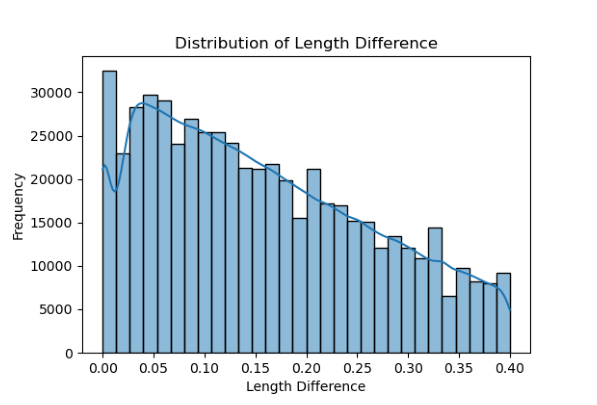

In [14]:
figure_path = os.path.join(exploratory_folder, "length_diff_distribution.png")
img = plt.imread(figure_path)
plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

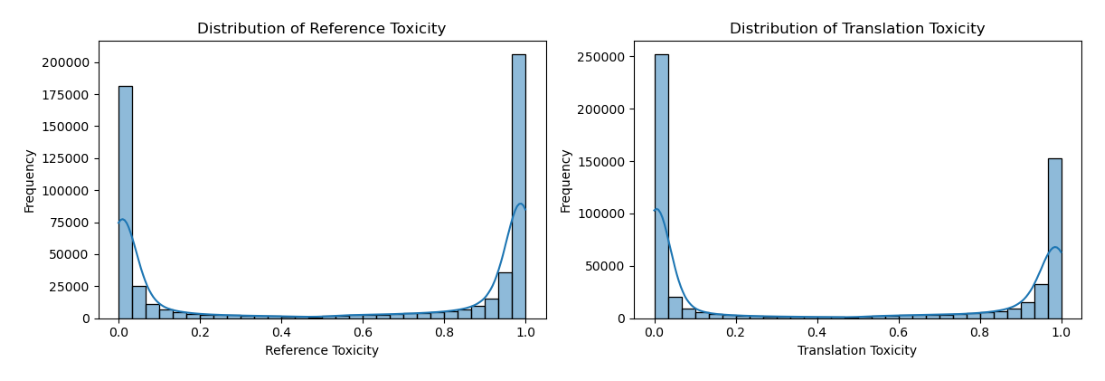

In [15]:
figure_path = os.path.join(exploratory_folder, "toxicity_distributions.png")
img = plt.imread(figure_path)
plt.figure(figsize=(14, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

On correlalation matrix we found negative correlation between trn_tox and ref_tox. That means that as the toxicity level of the reference text increases, the toxicity level of the translated text decreases, and vice versa

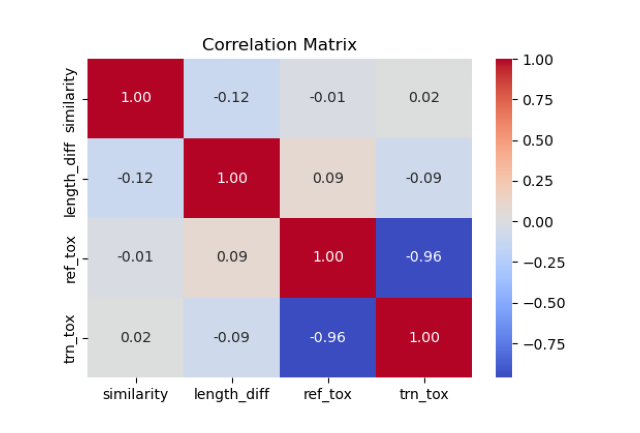

In [16]:
figure_path = os.path.join(exploratory_folder, "correlation_matrix.png")
img = plt.imread(figure_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

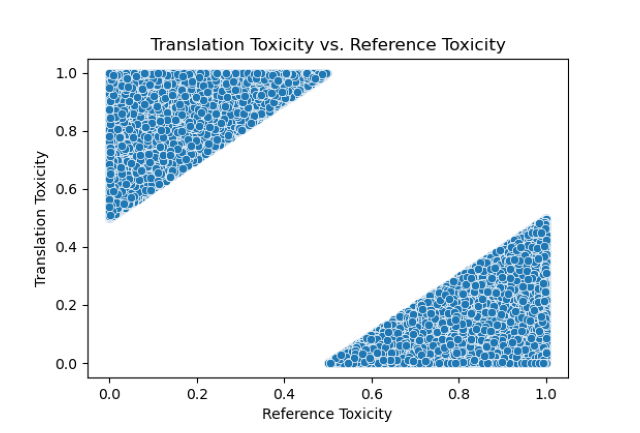

In [17]:
figure_path = os.path.join(exploratory_folder, "toxicity_scatter.png")
img = plt.imread(figure_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

## 5. Text Analysis

The distributions of lengths of referenced and translated texts are nearly the same. The 75 percentile of lenght_diff is only 0.25 (look at boxplots)

Moreover, considering only sentences of length less than 75 will cover most part of the df

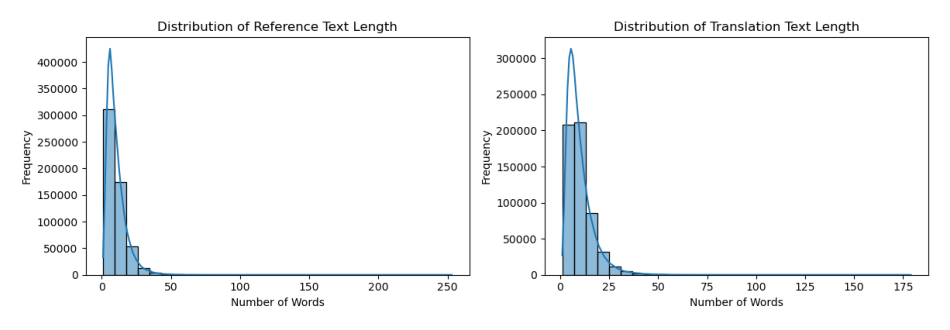

In [18]:
figure_path = os.path.join(exploratory_folder, "text_length_distributions.png")
img = plt.imread(figure_path)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Word Clouds

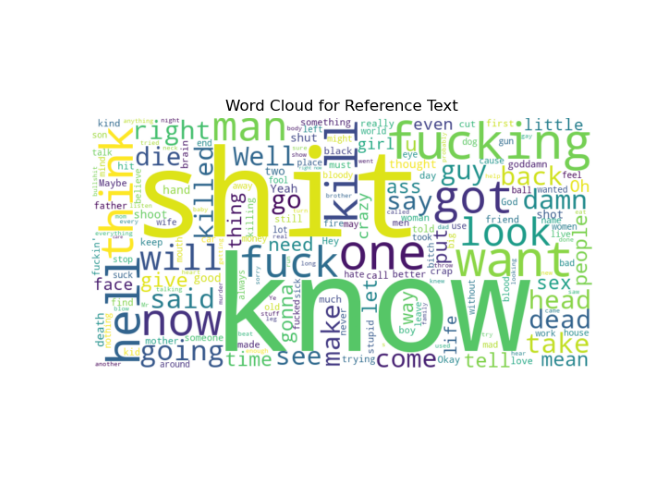

In [19]:
figure_path = os.path.join(exploratory_folder, "reference_wordcloud.png")
img = plt.imread(figure_path)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


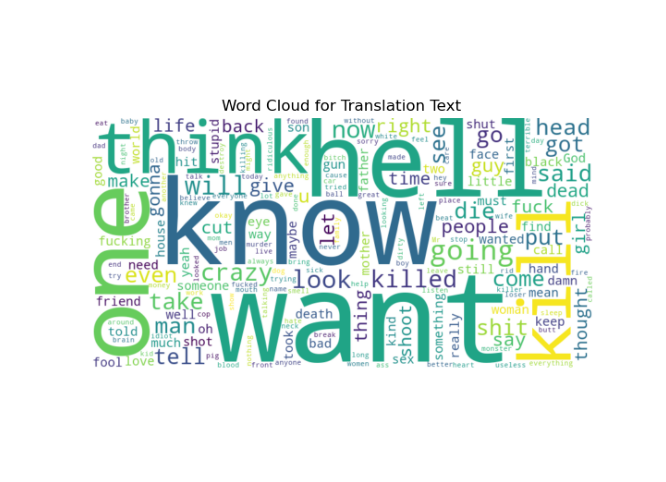

In [20]:
figure_path = os.path.join(exploratory_folder, "translation_wordcloud.png")
img = plt.imread(figure_path)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Common Words

In [21]:
from collections import Counter

words_question1 = ' '.join(df['reference']).lower().split()
words_question2 = ' '.join(df['translation']).lower().split()

counter_question1 = Counter(words_question1)
counter_question2 = Counter(words_question2)

print("Most common words in reference:", counter_question1.most_common(10))
print("Most common words in translation:", counter_question2.most_common(10))

Most common words in reference: [('the', 210387), ('you', 162749), ('a', 151574), ('to', 136903), ('i', 123951), ('and', 122021), ('of', 88565), ('in', 65671), ('that', 60538), ('your', 55042)]
Most common words in translation: [('the', 217820), ('you', 159911), ('a', 156199), ('to', 142760), ('and', 130493), ('i', 113896), ('of', 93701), ('in', 66639), ('he', 56064), ('your', 52728)]


#### Analyzing Stopwords

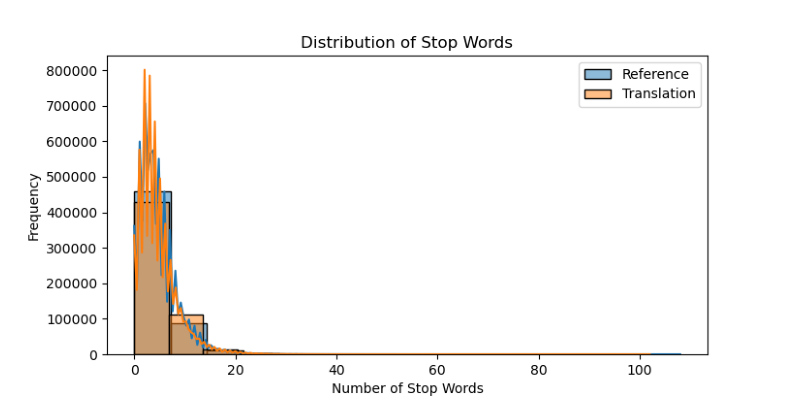

In [22]:
figure_path = os.path.join(exploratory_folder, "stopwords_distribution.png")
img = plt.imread(figure_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Unigrams Frequency Analysis

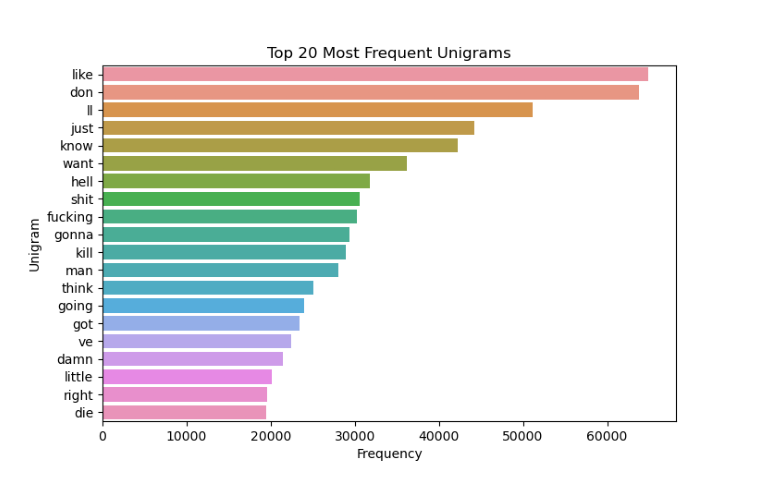

In [23]:
figure_path = os.path.join(exploratory_folder, "top_unigrams.png")
img = plt.imread(figure_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

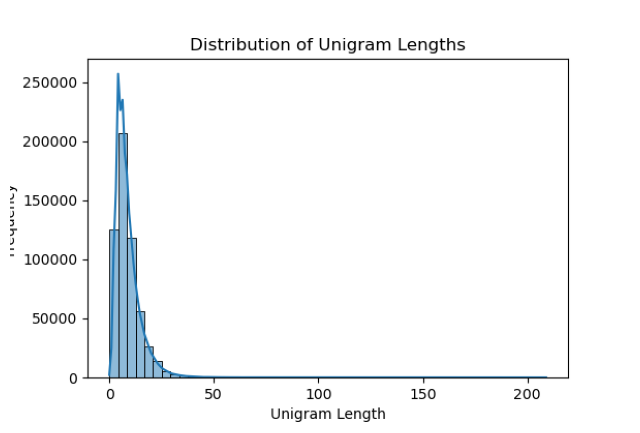

In [24]:
figure_path = os.path.join(exploratory_folder, "unigram_length_distribution.png")
img = plt.imread(figure_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
unigrams = vectorizer.fit_transform(df['text_combined'])
unigram_lengths = np.array(unigrams.sum(axis=1)).squeeze()

min_unigram_length = unigram_lengths.min()
max_unigram_length = unigram_lengths.max()

print("Minimum length of unigram:", min_unigram_length)
print("Maximum length of unigram:", max_unigram_length)

Minimum length of unigram: 0
Maximum length of unigram: 209


## 6. Additional Insights

Sentiment polarity measures the emotional tone of text, indicating positivity (close to 1), negativity (close to -1), or neutrality (close to 0). Positive scores represent positive emotions, negative scores indicate negative emotions, and scores around 0 signify a neutral tone.

In [27]:
from textblob import TextBlob

def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['reference_sentiment'] = df['reference'].apply(get_sentiment_polarity)
df['translation_sentiment'] = df['translation'].apply(get_sentiment_polarity)

#### Most common words in toxic and non-toxic pairs

In [28]:
toxic_pairs = df[df['ref_tox'] > 0.5]  # Select highly toxic pairs
non_toxic_pairs = df[df['ref_tox'] <= 0.5]  # Select non-toxic pairs

In [29]:
toxic_tokens = ' '.join(toxic_pairs['text_combined']).lower().split()
non_toxic_tokens = ' '.join(non_toxic_pairs['text_combined']).lower().split()

toxic_word_freq = Counter(toxic_tokens)
non_toxic_word_freq = Counter(non_toxic_tokens)

print("Most common words in toxic pairs:")
print(toxic_word_freq.most_common(10))

print("\nMost common words in non-toxic pairs:")
print(non_toxic_word_freq.most_common(10))

Most common words in toxic pairs:
[('the', 233979), ('you', 182575), ('a', 165640), ('to', 152885), ('i', 136458), ('and', 136427), ('of', 100485), ('in', 72764), ('your', 58579), ('that', 55345)]

Most common words in non-toxic pairs:
[('the', 194228), ('a', 142133), ('you', 140085), ('to', 126778), ('and', 116087), ('i', 101389), ('of', 81781), ('in', 59546), ('your', 49191), ('he', 45137)]


In [30]:
df.head()

,reference,translation,similarity,length_diff,ref_tox,trn_tox,reference_length,translation_length,text_combined,common_words,common_words_count,reference_stopwords,translation_stopwords,reference_sentiment,translation_sentiment
index,,,,,,,,,,,,,,,
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983,15,16,"If Alkar is flooding her with psychic waste, t...","{her, the, with, high, if, alkar, of, waste,}",8,7,7,-0.020000,-0.046667
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039,4,3,Now you're getting nasty. you're becoming disg...,{you're},1,2,1,-1.000000,-0.275000
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068,8,6,"Well, we could spare your life, for one. well,...","{we, spare, well,, your}",4,3,3,0.000000,0.000000
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215,9,6,"Ah! Monkey, you've got to snap out of it. monk...","{to, monkey,}",2,4,3,-0.050000,-0.050000
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348,7,6,I've got orders to put her down. I have orders...,"{to, orders}",2,2,3,-0.155556,0.000000


In [31]:
df.corr()

,similarity,length_diff,ref_tox,trn_tox,reference_length,translation_length,common_words_count,reference_stopwords,translation_stopwords,reference_sentiment,translation_sentiment
similarity,1.000000,-0.115710,-0.014009,0.017406,-0.008805,-0.003098,0.230023,-0.000498,-0.012496,-0.034006,-0.023738
length_diff,-0.115710,1.000000,0.086194,-0.085522,-0.070629,-0.179518,-0.178389,-0.072392,-0.162381,-0.045007,0.005799
ref_tox,-0.014009,0.086194,1.000000,-0.959537,0.018291,-0.011762,0.010059,0.005415,0.004146,-0.135612,0.134340
trn_tox,0.017406,-0.085522,-0.959537,1.000000,-0.021833,0.007767,-0.012199,-0.009401,-0.008321,0.123160,-0.145985
reference_length,-0.008805,-0.070629,0.018291,-0.021833,1.000000,0.938769,0.843793,0.933889,0.880006,0.098410,0.099786
translation_length,-0.003098,-0.179518,-0.011762,0.007767,0.938769,1.000000,0.836824,0.863685,0.943970,0.100307,0.095490
common_words_count,0.230023,-0.178389,0.010059,-0.012199,0.843793,0.836824,1.000000,0.814275,0.807309,0.098906,0.102075
reference_stopwords,-0.000498,-0.072392,0.005415,-0.009401,0.933889,0.863685,0.814275,1.000000,0.880088,0.091449,0.089060
translation_stopwords,-0.012496,-0.162381,0.004146,-0.008321,0.880006,0.943970,0.807309,0.880088,1.000000,0.087236,0.095594
reference_sentiment,-0.034006,-0.045007,-0.135612,0.123160,0.098410,0.100307,0.098906,0.091449,0.087236,1.000000,0.453591


In [33]:
INTERIM_DIR = "../data/interim"
DF_TSV_PATH = os.path.join(INTERIM_DIR, "df_eda.tsv")
df.to_csv(DF_TSV_PATH, sep='\t', index=False)